In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.utils import *
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


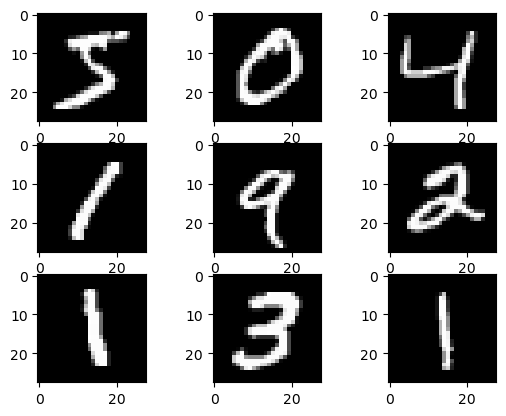

In [4]:
from matplotlib import pyplot
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
plt.show()

In [5]:
train_X[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
# Normalization
train_X = train_X/255.0
test_X = test_X/255.0

In [7]:
train_y = to_categorical(train_y, num_classes=10)
test_y = to_categorical(test_y, num_classes=10)

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28,28,)))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

Metal device set to: Apple M1


2022-11-02 20:57:28.463309: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-02 20:57:28.463881: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_X,train_y, epochs = 10, validation_data=(test_X,test_y), batch_size = 512)

Epoch 1/10


2022-11-02 20:57:40.767637: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-02 20:57:41.035272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 3s 13ms/step - loss: 1.1305 - accuracy: 0.6611 - val_loss: 0.4691 - val_accuracy: 0.8756
Epoch 2/10
  1/118 [..............................] - ETA: 0s - loss: 0.5493 - accuracy: 0.8418

2022-11-02 20:57:43.383254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 1s 9ms/step - loss: 0.3829 - accuracy: 0.8960 - val_loss: 0.3149 - val_accuracy: 0.9140
Epoch 3/10
118/118 [==============================] - 1s 9ms/step - loss: 0.2913 - accuracy: 0.9182 - val_loss: 0.2613 - val_accuracy: 0.9264
Epoch 4/10
118/118 [==============================] - 1s 8ms/step - loss: 0.2504 - accuracy: 0.9300 - val_loss: 0.2337 - val_accuracy: 0.9358
Epoch 5/10
118/118 [==============================] - 1s 8ms/step - loss: 0.2243 - accuracy: 0.9363 - val_loss: 0.2159 - val_accuracy: 0.9394
Epoch 6/10
118/118 [==============================] - 1s 8ms/step - loss: 0.2055 - accuracy: 0.9416 - val_loss: 0.2052 - val_accuracy: 0.9411
Epoch 7/10
118/118 [==============================] - 1s 8ms/step - loss: 0.1911 - accuracy: 0.9455 - val_loss: 0.1932 - val_accuracy: 0.9438
Epoch 8/10
118/118 [==============================] - 1s 8ms/step - loss: 0.1797 - accuracy: 0.9489 - val_loss: 0.1963 - val_accuracy: 0.9431
Epoch 9/10
118/11

In [12]:
test_loss, test_acc= model.evaluate(test_X,test_y,verbose=2)

313/313 - 1s - loss: 0.1736 - accuracy: 0.9481 - 1s/epoch - 5ms/step
